In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


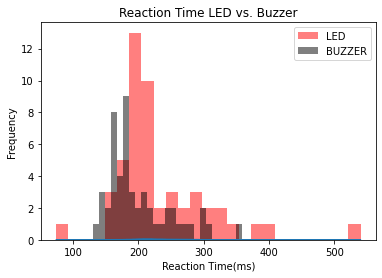

In [ ]:
#create numpy arrays for data, plot one histogram, then plot other with color
import numpy as np
import matplotlib.pyplot as plt

reaction_data = np.loadtxt("/content/drive/My Drive/1E Data - Sheet1.csv", delimiter = ',')
led_data = reaction_data[:,0]
buzzer_data = reaction_data[:,1]

plt.hist(led_data, bins = 25, color = 'red', alpha = 0.5, label = "LED")
plt.hist(buzzer_data, bins = 25, color = 'black', alpha = 0.5, label = "BUZZER")
plt.xlabel("Reaction Time(ms)")
plt.ylabel("Frequency")
plt.title("Reaction Time LED vs. Buzzer")
plt.legend()

def gaussian_function(x, a, sigma, mu):
  y = a * np.exp(-(x - mu)**2. / (2. * sigma**2.))
  return y

# led_curve_array = gaussian_function(led_data, np.amax(led_data), 74.73613316194518, 232.52)
# buzzer_curve_array = gaussian_function(buzzer_data, np.amax(buzzer_data), 49.16032546678266, 201.32)

# plt.plot(led_data, led_curve_array, color = 'blue', linewidth = 3.0)
# plt.plot(buzzer_data, buzzer_curve_array, color = 'yellow', linewidth = 3.0)

In [ ]:
#calculate average and std dev
#LED
print("LED std: " + str(np.std(led_data)))
print("LED mean: " + str(np.mean(led_data)))
#BUZZER
print("BUZZER std: " + str(np.std(buzzer_data)))
print("BUZZER mean: " + str(np.mean(buzzer_data)))

LED std: 74.73613316194518
LED mean: 232.52
BUZZER std: 49.16032546678266
BUZZER mean: 201.32


In [ ]:
from scipy import stats
stats.ttest_ind(led_data,buzzer_data)

Ttest_indResult(statistic=2.4414464057403142, pvalue=0.01642199858844007)

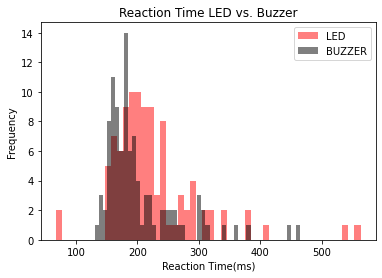

In [ ]:
reaction_data_100 = np.loadtxt("/content/drive/My Drive/1E100.csv", delimiter = ',')
led_data_100 = reaction_data_100[:,0]
buzzer_data_100 = reaction_data_100[:,1]
plt.hist(led_data_100, bins = 50, color = 'red', alpha = 0.5, label = "LED")
plt.hist(buzzer_data_100, bins = 50, color = 'black', alpha = 0.5, label = "BUZZER")
plt.xlabel("Reaction Time(ms)")
plt.ylabel("Frequency")
plt.title("Reaction Time LED vs. Buzzer")
plt.legend()

In [ ]:
#calculate average and std dev
#LED
print("LED std: " + str(np.std(led_data_100)))
print("LED mean: " + str(np.mean(led_data_100)))
#BUZZER
print("BUZZER std: " + str(np.std(buzzer_data_100)))
print("BUZZER mean: " + str(np.mean(buzzer_data_100)))

LED std: 73.61229448943973
LED mean: 224.49
BUZZER std: 61.80740732307091
BUZZER mean: 203.38


In [ ]:
stats.ttest_ind(led_data_100,buzzer_data_100)

Ttest_indResult(statistic=2.1852196546307474, pvalue=0.030046394751225614)

The mean reaction time for the LED is about 20ms higher than the mean time for the buzzer. Also the standard deviation is slightly higher by 10ms. This means that it takes longer for the participant to react to the LED and the single reaction tests differ more from one another. This could be because of the lighting in the environment that affects seeing the LED as well as the location of the button where it was placed such that one's finger could block the LED at times. Overall, these changes are somewhat significant because the LED seems to be harder to react to based on the data. Furthermore, looking at the p-value of 0.03, it is less than 0.05 which means that it is statistically significant against the null hypothesis which is that there is nothing causing a significant change in values. Hence, there is a mechanism that is different between the LED and the buzzer that would cause the significant change in data. In this case it is probably the lighting and the ease which the user can see the light versus hear the buzzer. 


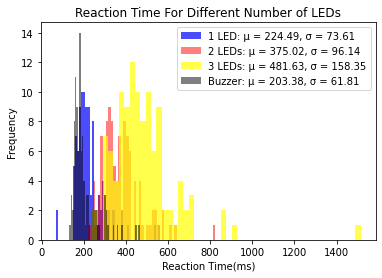

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
reaction_data_100 = np.loadtxt("/content/drive/My Drive/1E100.csv", delimiter = ',')
threeled_data = np.loadtxt("/content/drive/My Drive/twoled.csv", delimiter = ',')
twoled_data = np.loadtxt("/content/drive/My Drive/threeled.csv", delimiter = ',')
led_data_100 = reaction_data_100[:,0]
buzzer_data_100 = reaction_data_100[:,1]
threeled = threeled_data[:,1]
twoled = twoled_data[:,1]
#change alpha values?
plt.hist(led_data_100, bins = 50, color = 'blue', alpha = 0.7, label = "1 LED: μ = 224.49, σ = 73.61")
plt.hist(twoled, bins = 50, color = 'red', alpha = 0.5, label = "2 LEDs: μ = 375.02, σ = 96.14")
plt.hist(threeled, bins = 50, color = 'yellow', alpha = 0.7, label = "3 LEDs: μ = 481.63, σ = 158.35")
plt.hist(buzzer_data_100, bins = 50, color = 'black', alpha = 0.5, label = "Buzzer: μ = 203.38, σ = 61.81")
plt.xlabel("Reaction Time(ms)")
plt.ylabel("Frequency")
plt.title("Reaction Time For Different Number of LEDs")
plt.legend()

In [ ]:
from scipy import stats

print("1 std: " + str(np.std(led_data_100)))
print("1 mean: " + str(np.mean(led_data_100)))
print("2 std: " + str(np.std(twoled)))
print("2 mean: " + str(np.mean(twoled)))
print("3 std: " + str(np.std(threeled)))
print("3 mean: " + str(np.mean(threeled)))
#much less than 0.05?
print("p(1,2): " + str(stats.ttest_ind(led_data_100,twoled)))
print("p(1,3): " + str(stats.ttest_ind(led_data_100,threeled)))
print("p(2,3): " + str(stats.ttest_ind(twoled,threeled)))

1 std: 73.61229448943973
1 mean: 224.49
2 std: 96.13747832318595
2 mean: 375.0188679245283
3 std: 158.35277801481004
3 mean: 481.6306306306306
p(1,2): Ttest_indResult(statistic=-12.502815193645292, pvalue=5.311726362886416e-27)
p(1,3): Ttest_indResult(statistic=-14.786000880395584, pvalue=2.4785040360852057e-34)
p(2,3): Ttest_indResult(statistic=-5.933852303588917, pvalue=1.1717498299827187e-08)
